In [134]:
# import
import pandas as pd
import numpy as np
from pandasql import sqldf
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
from wordcloud import WordCloud, STOPWORDS

In [82]:
# import datasets
titles_rating = pd.read_csv("/Users/huongngo/Desktop/PERSONAL PROJECTS/streaming_analysis/data/processed/netflix_rating.csv")
shows_rating = pd.read_csv("/Users/huongngo/Desktop/PERSONAL PROJECTS/streaming_analysis/data/processed/netflix_shows_rating.csv")
films_rating = pd.read_csv("/Users/huongngo/Desktop/PERSONAL PROJECTS/streaming_analysis/data/processed/netflix_films_rating.csv")

In [84]:
# glimpse at datasets
print(len(shows_rating))
shows_rating.head()

2676


,show_id,type,title,director,cast,country,date_added,month_added,year_added,release_year,...,description,seasons,titleId,averageRating,numVotes,cast_genders,cast_majority,cast_ratio,director_genders,director_majority
0,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",9,2021,2021,...,"After crossing paths at a party, a Cape Town t...",2.0,NaN,NaN,NaN,"['female', 'female', 'female', 'male', 'male',...",female,0.526316,NaN,none
1,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",9,2021,2021,...,To protect his family from a powerful drug lor...,1.0,tt1159219,7.2,11.0,"['male', 'female', 'male', 'female', 'female',...",male,0.333333,['male'],male
2,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",9,2021,2021,...,"Feuds, flirtations and toilet talk go down amo...",1.0,tt15320436,6.7,221.0,NaN,none,0.000000,NaN,none
3,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",9,2021,2021,...,In a city of coaching centers known to train I...,2.0,tt9432978,9.1,69672.0,"['male', 'male', 'male', 'male', 'female', 'un...",male,0.250000,NaN,none
4,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",9,2021,2021,...,The arrival of a charismatic young priest brin...,1.0,NaN,NaN,NaN,"['female', 'male', 'male', 'male', 'female', '...",male,0.437500,['male'],male


In [91]:
columns_s = list(shows_rating.columns)
print(columns_s)

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'month_added', 'year_added', 'release_year', 'rating', 'length', 'listed_in', 'description', 'seasons', 'titleId', 'averageRating', 'numVotes', 'cast_genders', 'cast_majority', 'cast_ratio', 'director_genders', 'director_majority']


In [85]:
# glimpse at datasets
print(len(films_rating))
films_rating.head()

6131


,show_id,type,title,director,cast,country,date_added,month_added,year_added,release_year,...,listed_in,description,titleId,averageRating,numVotes,cast_genders,cast_majority,cast_ratio,director_genders,director_majority
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",9,2021,2020,...,Documentaries,"As her father nears the end of his life, filmm...",tt11394180,7.4,6543.0,NaN,none,0.000000,['female'],female
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",9,2021,2021,...,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,tt10101702,6.8,3664.0,"['female', 'female', 'male', 'female', 'female...",female,0.600000,"['male', 'male']",male
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",9,2021,1993,...,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",tt0108041,7.0,698.0,"['male', 'female', 'female', 'male', 'male', '...",male,0.375000,['male'],male
3,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",9,2021,2021,...,"Comedies, Dramas",A woman adjusting to life after a loss contend...,tt5164438,6.3,12681.0,"['female', 'unknown', 'male', 'male', 'male', ...",female,0.454545,['male'],male
4,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",9,2021,2021,...,"Dramas, International Movies",After most of her family is murdered in a terr...,tt9205538,5.5,1129.0,"['female', 'male', 'male', 'male', 'female', '...",male,0.454545,['male'],male


In [92]:
columns_f = list(films_rating.columns)
print(columns_f)

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'month_added', 'year_added', 'release_year', 'rating', 'length', 'listed_in', 'description', 'titleId', 'averageRating', 'numVotes', 'cast_genders', 'cast_majority', 'cast_ratio', 'director_genders', 'director_majority']


In [111]:
str_columns = ['title', 'director', 'cast', 'country', 'date_added', 'rating', 'listed_in', 'description']
for column in str_columns:
    shows_rating[column] = shows_rating[column].fillna("")
    films_rating[column] = films_rating[column].fillna("")

num_columns_f = ['length', 'averageRating', 'numVotes']
num_columns_s = ['seasons', 'averageRating', 'numVotes']
for column in num_columns_s:
    shows_rating[column] = shows_rating[column].fillna(0)

for column in num_columns_f:
    films_rating[column] = films_rating[column].fillna(0)

In [8]:
# function to get unique values of a column
def getUnique(data):
    unique_values = set()
    for value in data:
        if type(value) is float:
            unique_values.add(None)
        else:
            values = value.split(", ")
            for i in values:
                unique_values.add(i)
    return list(unique_values)

In [9]:
# function get count of a unique value that is part of a column that needs to be parsed
def getCount(data, token):
    count = 0
    for value in data:
        if type(value) is not float:
            values = value.split(", ")
            if token in values:
                count += 1
    return count

## Overview Analysis

In [21]:
sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")

### Columns of Interest:
- Director
- Cast
- Country
- Year Added
- Rating
- Genre (listed_in)
- Description
- Average Rating
- Number of Votes
- Majority Gender Representation in Cast
- Cast Ratio (Female to Others)
- Majority Gender Representation in Directors (for a single film) (i.e A film can have multiple directors)

### Director

In [10]:
# directors for SHOWS
unique_directors_s = getUnique(shows_rating['director'])
directors_dict_s = dict.fromkeys(unique_directors_s, 0)
for director in unique_directors_s:
    count_s = getCount(shows_rating['director'], director)
    directors_dict_s[director] = count_s

directors_df_s = pd.DataFrame({"director": directors_dict_s.keys(), "count": directors_dict_s.values()})
directors_df_s = directors_df_s.sort_values(by=['count'], ascending = False)
directors_df_s.head(5)

,director,count
50,Ken Burns,3
95,Alastair Fothergill,3
200,Iginio Straffi,2
55,Joe Berlinger,2
168,Gautham Vasudev Menon,2


In [11]:
# directors for FILMS
unique_directors_f = getUnique(films_rating['director'])
directors_dict_f = dict.fromkeys(unique_directors_f, 0)
for director in unique_directors_f:
    count_f = getCount(films_rating['director'], director)
    directors_dict_f[director] = count_f

directors_df_f = pd.DataFrame({"director": directors_dict_f.keys(), "count": directors_dict_f.values()})
directors_df_f = directors_df_f.sort_values(by=['count'], ascending = False)
directors_df_f.head(5)

,director,count
1118,Rajiv Chilaka,22
2742,Jan Suter,21
936,Raúl Campos,19
669,Suhas Kadav,16
2613,Jay Karas,15


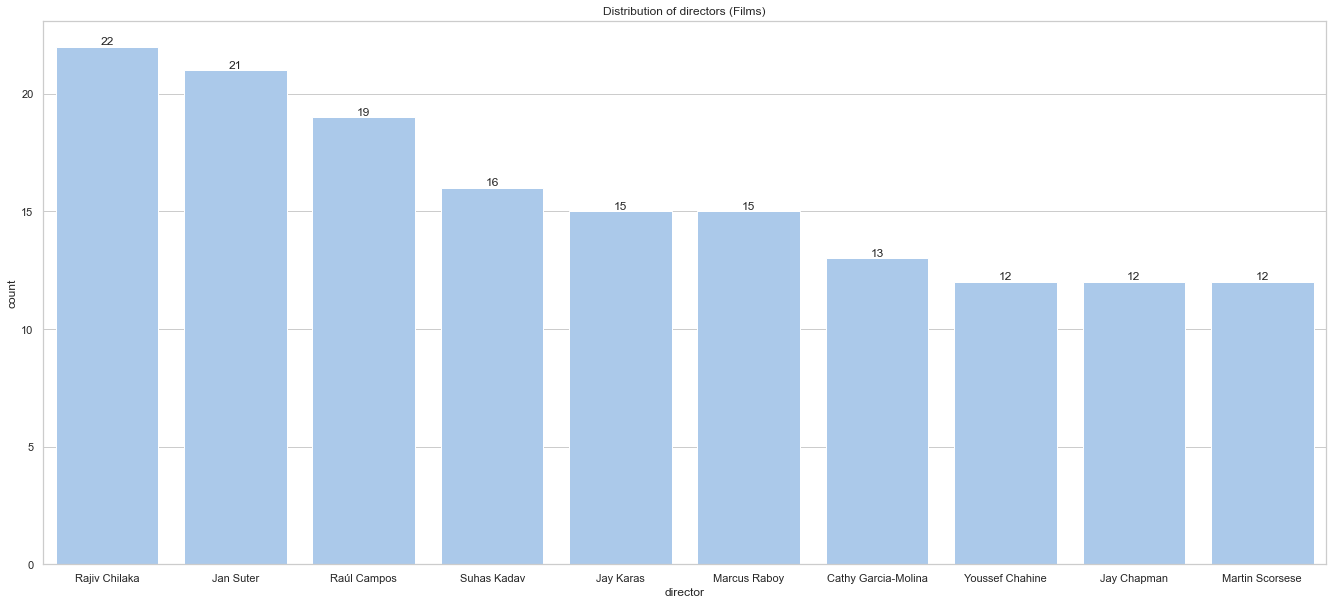

In [29]:
fig, ax = plt.subplots(figsize = (23, 10))
directors_plt_f = sns.barplot(x = 'director', y = 'count', data = directors_df_f.head(10), color = "b")
directors_plt_f.set_title("Distribution of directors (Films)")
for i in ax.containers:
    ax.bar_label(i,)

### Cast

In [15]:
# actors for SHOWS
unique_actors_s = getUnique(shows_rating['cast'])
actors_dict_s = dict.fromkeys(unique_actors_s, 0)
for actor in unique_actors_s:
    count_s = getCount(shows_rating['cast'], actor)
    actors_dict_s[actor] = count_s

actors_df_s = pd.DataFrame({"actor": actors_dict_s.keys(), "count": actors_dict_s.values()})
actors_df_s = actors_df_s.sort_values(by=['count'], ascending = False)
actors_df_s.head(10)

,actor,count
4984,Takahiro Sakurai,25
12370,Yuki Kaji,19
2839,Junichi Suwabe,17
5418,Ai Kayano,17
3165,Daisuke Ono,17
6353,Yuichi Nakamura,16
6452,Yoshimasa Hosoya,15
14125,Jun Fukuyama,15
3732,David Attenborough,14
13557,Kana Hanazawa,13


In [16]:
# actors for SHOWS
unique_actors_f = getUnique(films_rating['cast'])
actors_dict_f = dict.fromkeys(unique_actors_f, 0)
for actor in unique_actors_f:
    count_f = getCount(films_rating['cast'], actor)
    actors_dict_f[actor] = count_f

actors_df_f = pd.DataFrame({"actor": actors_dict_f.keys(), "count": actors_dict_f.values()})
actors_df_f = actors_df_f.sort_values(by=['count'], ascending = False)
actors_df_f.head(10)

,actor,count
9047,Anupam Kher,42
16887,Shah Rukh Khan,35
25682,Naseeruddin Shah,32
2375,Om Puri,30
23283,Akshay Kumar,30
24208,Paresh Rawal,28
4374,Julie Tejwani,28
9430,Amitabh Bachchan,28
15811,Boman Irani,27
25489,Rupa Bhimani,27


### Country

In [23]:
# SHOWS countries
unique_country_s = getUnique(shows_rating['country'])
country_dict_s = dict.fromkeys(unique_country_s, 0)
for country in unique_country_s:
    count_s = getCount(shows_rating['country'], country)
    country_dict_s[country] = count_s

country_df_s = pd.DataFrame({"country": country_dict_s.keys(), "count": country_dict_s.values()})
country_df_s = country_df_s.sort_values(by=['count'], ascending = False)
country_df_s.head(10)

,country,count
17,United States,938
40,United Kingdom,272
41,Japan,199
60,South Korea,170
48,Canada,126
2,France,90
15,India,84
24,Taiwan,70
37,Australia,66
56,Spain,61


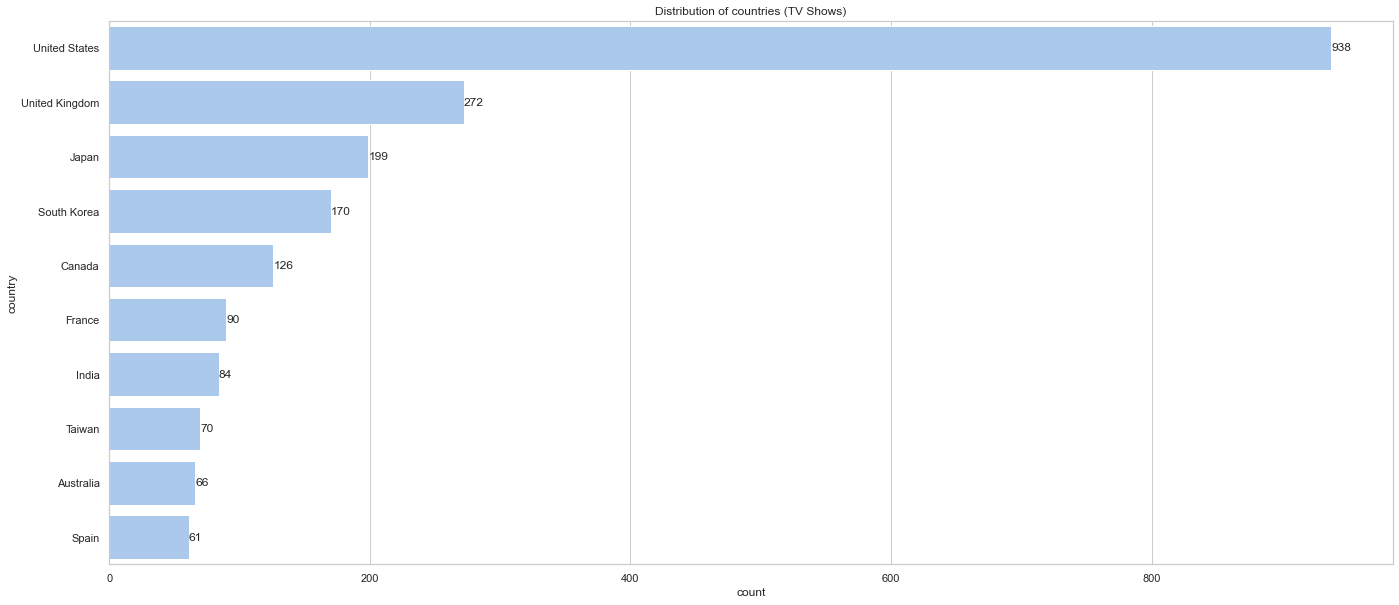

In [30]:
fig, ax = plt.subplots(figsize = (23, 10))
country_plt_s = sns.barplot(x = 'count', y = 'country', data = country_df_s.head(10), color = "b")
country_plt_s.set_title("Distribution of countries (TV Shows)")
for i in ax.containers:
    ax.bar_label(i,)

In [24]:
# FILMS countries
unique_country_f = getUnique(films_rating['country'])
country_dict_f = dict.fromkeys(unique_country_f, 0)
for country in unique_country_f:
    count_f = getCount(films_rating['country'], country)
    country_dict_f[country] = count_f

country_df_f = pd.DataFrame({"country": country_dict_f.keys(), "count": country_dict_f.values()})
country_df_f = country_df_f.sort_values(by=['count'], ascending = False)
country_df_f.head(10)

,country,count
96,United States,2751
6,India,962
77,United Kingdom,532
82,Canada,319
1,France,303
102,Germany,182
120,Spain,171
14,Japan,119
23,China,114
83,Mexico,111


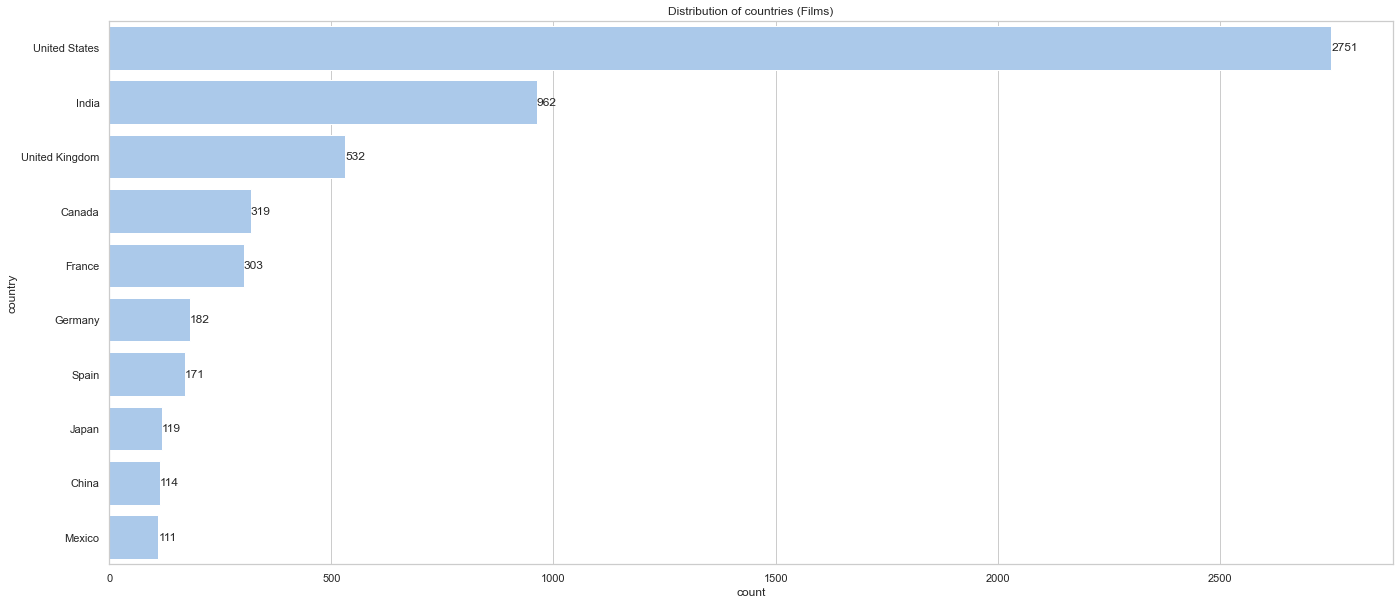

In [27]:
fig, ax = plt.subplots(figsize = (23, 10))
country_plt_f = sns.barplot(x = 'count', y = 'country', data = country_df_f.head(10), color = "b")
country_plt_f.set_title("Distribution of countries (Films)")
for i in ax.containers:
    ax.bar_label(i,)

### Year Added

In [38]:
query = """
SELECT year_added, type, COUNT(*) AS count
FROM titles_rating
GROUP BY year_added, type
"""
year_added_by_type = sqldf(query)
year_added_by_type = year_added_by_type.drop([0])
year_added_by_type

,year_added,type,count
1,2008,Movie,1
2,2008,TV Show,1
3,2009,Movie,2
4,2010,Movie,1
5,2011,Movie,13
6,2012,Movie,3
7,2013,Movie,6
8,2013,TV Show,5
9,2014,Movie,19
10,2014,TV Show,5


(2014.0, 2021.0)

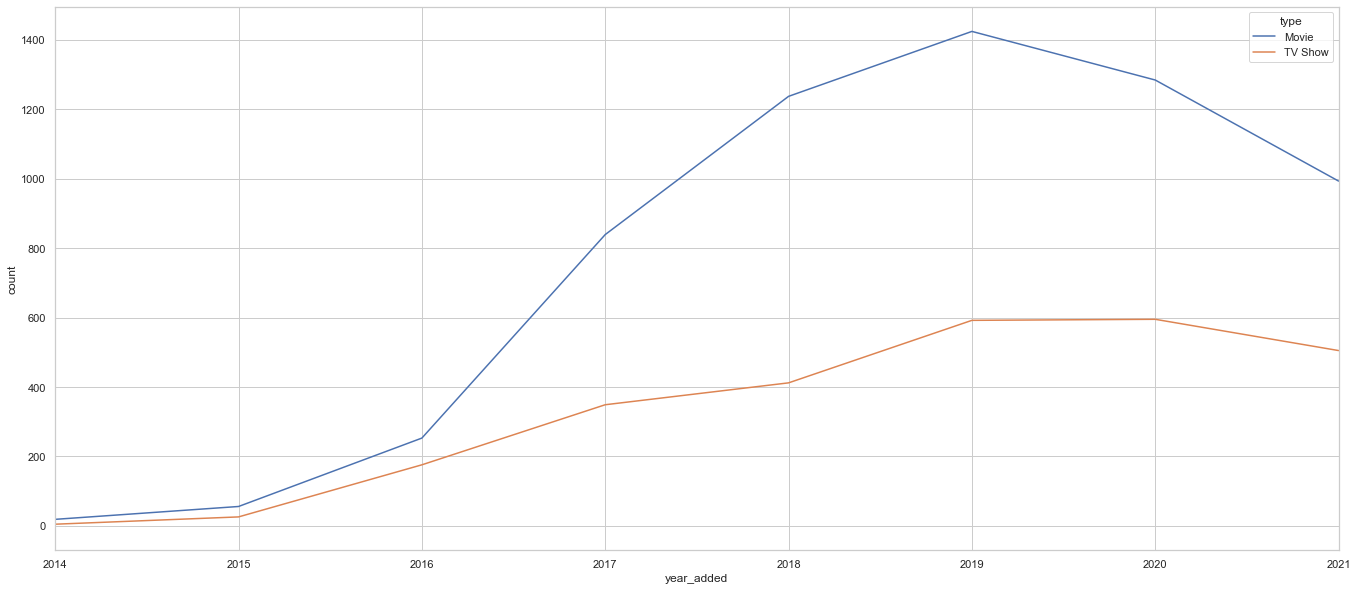

In [41]:
fig, ax = plt.subplots(figsize = (23, 10))
year_added_plt = sns.lineplot(x = 'year_added', y = 'count', hue = 'type', data = year_added_by_type)
year_added_plt.set_xlim(2014, 2021)

### Rating

In [49]:
query = """
SELECT type, rating, COUNT(*) AS count
FROM titles_rating
GROUP BY type, rating
"""
rating_by_type = sqldf(query)
rating_by_type = rating_by_type[rating_by_type['rating'] != ""]
rating_by_type

,type,rating,count
1,Movie,G,41
2,Movie,NC-17,3
3,Movie,NR,81
4,Movie,PG,287
5,Movie,PG-13,490
6,Movie,R,797
7,Movie,TV-14,1427
8,Movie,TV-G,126
9,Movie,TV-MA,2062
10,Movie,TV-PG,540


<AxesSubplot:xlabel='count', ylabel='rating'>

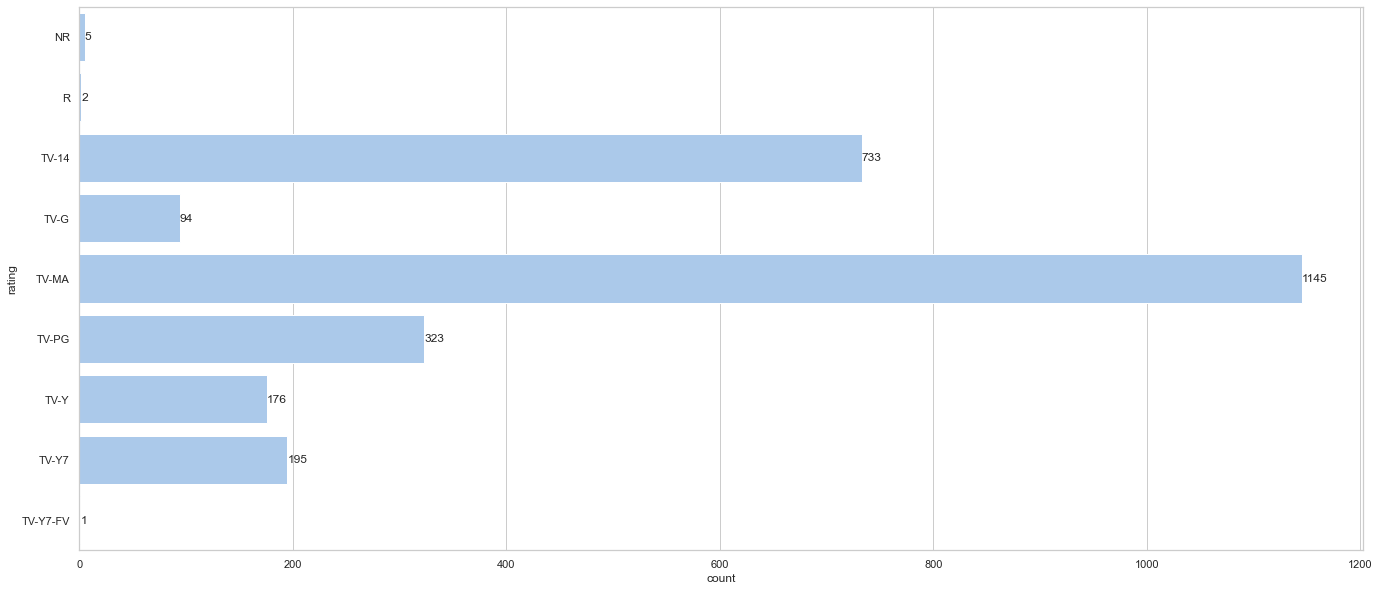

In [51]:
fig, ax = plt.subplots(figsize = (23, 10))
rating_plt_s = sns.barplot(x = 'count', y = 'rating', data = rating_by_type[rating_by_type['type'] == "TV Show"], color = "b")
for i in ax.containers:
    ax.bar_label(i,)
rating_plt_s

<AxesSubplot:xlabel='count', ylabel='rating'>

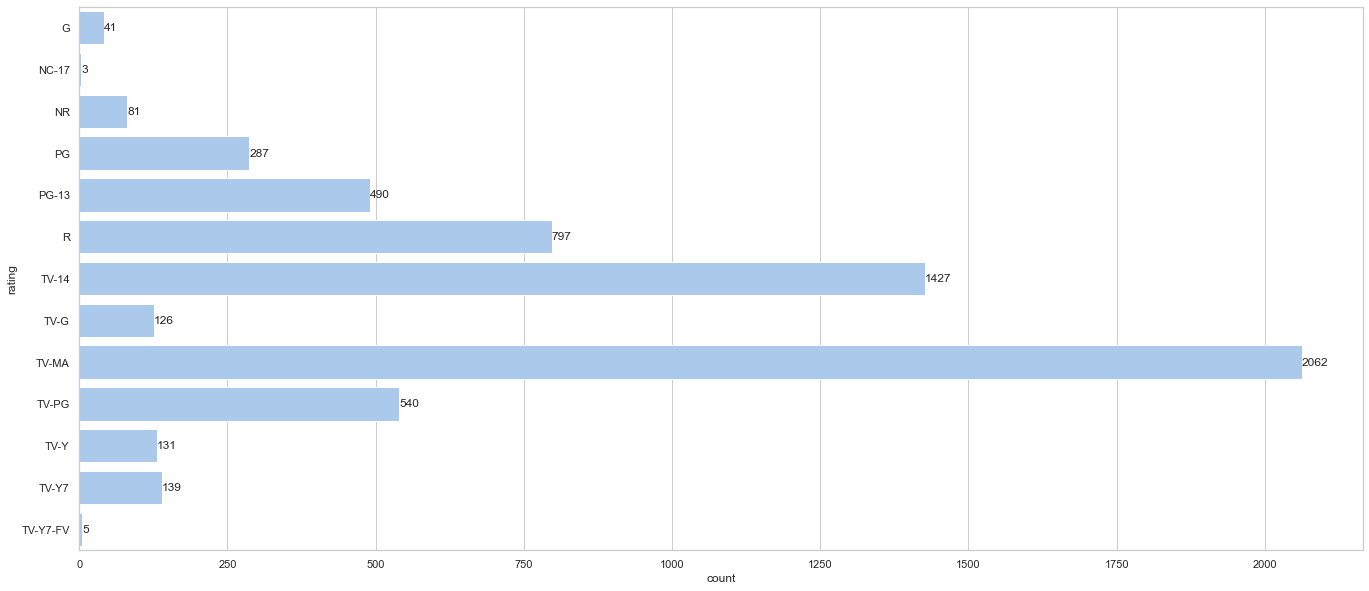

In [52]:
fig, ax = plt.subplots(figsize = (23, 10))
rating_plt_f = sns.barplot(x = 'count', y = 'rating', data = rating_by_type[rating_by_type['type'] == "Movie"], color = "b")
for i in ax.containers:
    ax.bar_label(i,)
rating_plt_f

### Genre (listed_in)

In [54]:
# FILMS countries
unique_genre_s = getUnique(shows_rating['listed_in'])
genre_dict_s = dict.fromkeys(unique_genre_s, 0)
for genre in unique_genre_s:
    count_s = getCount(shows_rating['listed_in'], genre)
    genre_dict_s[genre] = count_s

genre_df_s = pd.DataFrame({"genre": genre_dict_s.keys(), "count": genre_dict_s.values()})
genre_df_s = genre_df_s.sort_values(by=['count'], ascending = False)
genre_df_s.head(10)

,genre,count
17,International TV Shows,1351
0,TV Dramas,763
11,TV Comedies,581
6,Crime TV Shows,470
21,Kids' TV,451
7,Docuseries,395
13,Romantic TV Shows,370
1,Reality TV,255
8,British TV Shows,253
5,Anime Series,176


<AxesSubplot:xlabel='count', ylabel='genre'>

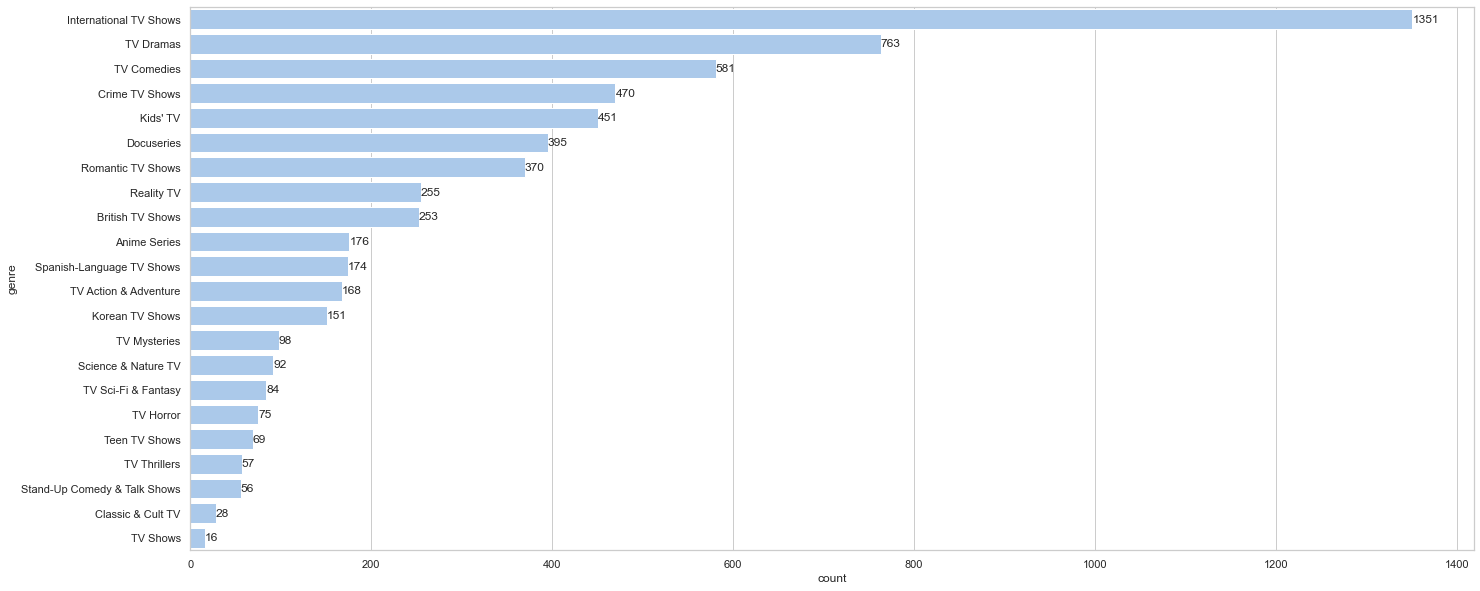

In [55]:
fig, ax = plt.subplots(figsize = (23, 10))
genre_plt_s = sns.barplot(x = 'count', y = 'genre', data = genre_df_s, color = "b")
for i in ax.containers:
    ax.bar_label(i,)
genre_plt_s

In [53]:
# FILMS countries
unique_genre_f = getUnique(films_rating['listed_in'])
genre_dict_f = dict.fromkeys(unique_genre_f, 0)
for genre in unique_genre_f:
    count_f = getCount(films_rating['listed_in'], genre)
    genre_dict_f[genre] = count_f

genre_df_f = pd.DataFrame({"genre": genre_dict_f.keys(), "count": genre_dict_f.values()})
genre_df_f = genre_df_f.sort_values(by=['count'], ascending = False)
genre_df_f.head(10)

,genre,count
18,International Movies,2752
2,Dramas,2427
16,Comedies,1674
1,Documentaries,869
19,Action & Adventure,859
7,Independent Movies,756
17,Children & Family Movies,641
6,Romantic Movies,616
8,Thrillers,577
3,Music & Musicals,375


<AxesSubplot:xlabel='count', ylabel='genre'>

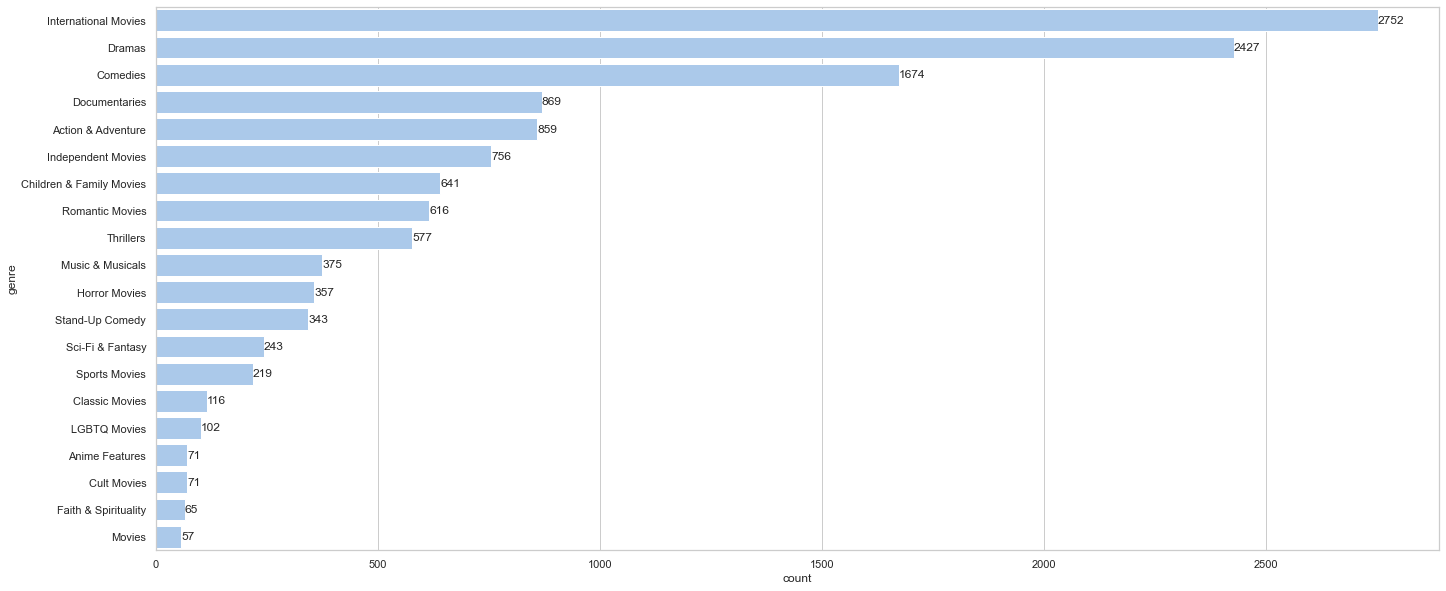

In [56]:
fig, ax = plt.subplots(figsize = (23, 10))
genre_plt_f = sns.barplot(x = 'count', y = 'genre', data = genre_df_f, color = "b")
for i in ax.containers:
    ax.bar_label(i,)
genre_plt_f

### Average Rating + Number of Votes

In [101]:
shows_rating[['averageRating']].describe()

,averageRating
count,2094.000000
mean,6.866476
std,1.159898
min,1.800000
25%,6.200000
50%,7.000000
75%,7.700000
max,9.500000


<AxesSubplot:xlabel='averageRating', ylabel='Count'>

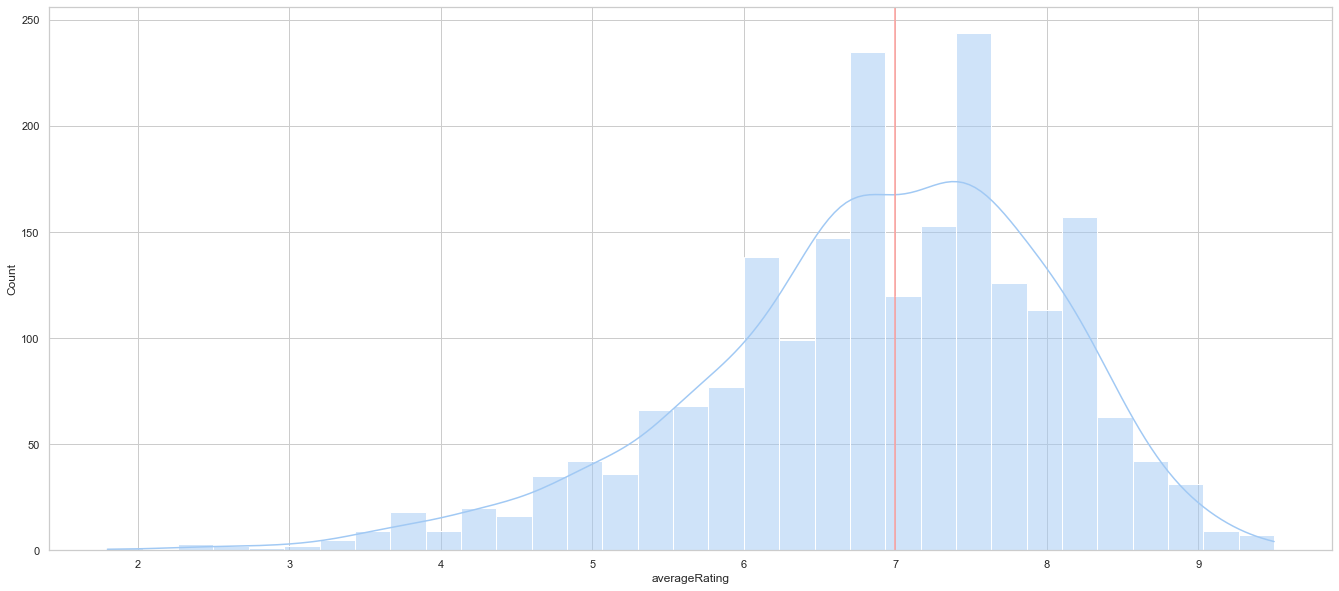

In [99]:
fig, ax = plt.subplots(figsize = (23, 10))
avg_rating_plt = sns.histplot(data = shows_rating, x = 'averageRating', color = "b", kde = True)
plt.axvline(x = 7, color = "r")
avg_rating_plt

In [102]:
shows_rating[['numVotes']].describe()

,numVotes
count,2.094000e+03
mean,1.194738e+04
std,5.687705e+04
min,5.000000e+00
25%,1.340000e+02
50%,7.985000e+02
75%,3.758750e+03
max,1.780783e+06


<AxesSubplot:xlabel='numVotes', ylabel='Count'>

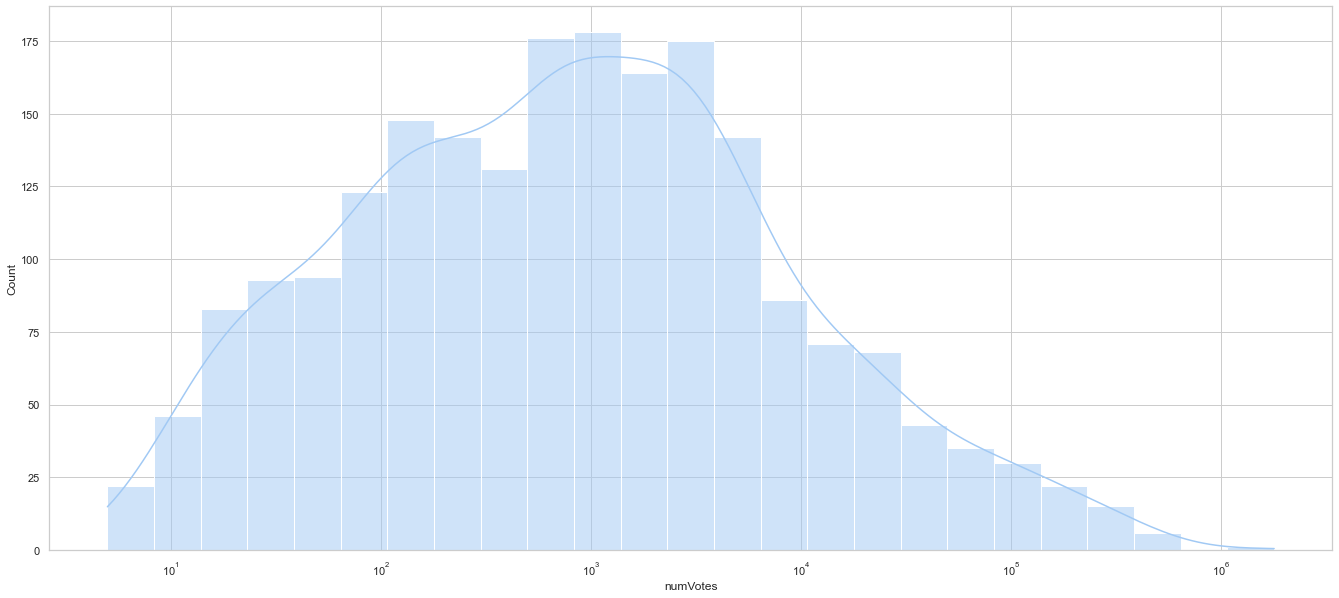

In [115]:
fig, ax = plt.subplots(figsize = (23, 10))
num_votes_plt = sns.histplot(data = shows_rating[shows_rating['numVotes'] != 0], x = 'numVotes', color = "b", log_scale = True, kde = True)
num_votes_plt

### Description

In [132]:
nlp = spacy.load("en_core_web_sm")
pos_words = {}
for desc in titles_rating['description']:
    doc = nlp(desc)
    for token in doc:
        pos = token.pos_
        if pos not in pos_words.keys():
            pos_words[pos] = [token.lemma_]
        else:
            pos_words[pos].append(token.lemma_)

In [135]:
pos_words.keys()

dict_keys(['SCONJ', 'PRON', 'NOUN', 'VERB', 'DET', 'ADP', 'PUNCT', 'PROPN', 'ADJ', 'CCONJ', 'PART', 'AUX', 'ADV', 'NUM', 'X', 'SYM', 'INTJ', 'SPACE'])

In [138]:
def plt_wc(words):
    fig, ax = plt.subplots(figsize = (10, 10))
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', width = 5000, height = 5000, colormap = "RdPu").generate(words)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

for pos in pos_words:
    pos_words[pos] = " ".join(pos_words[pos])

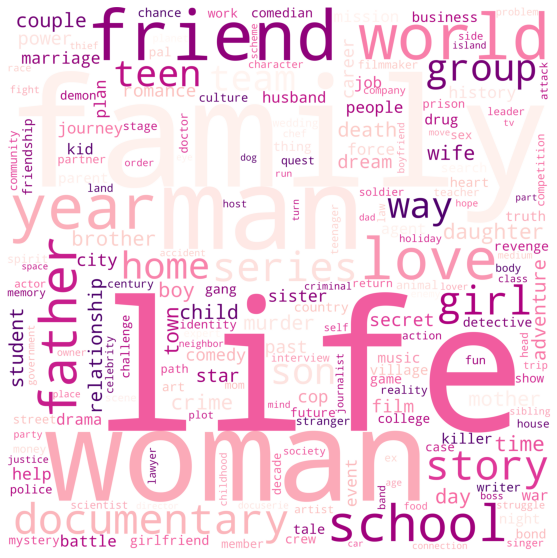

In [139]:
plt_wc(pos_words['NOUN'])

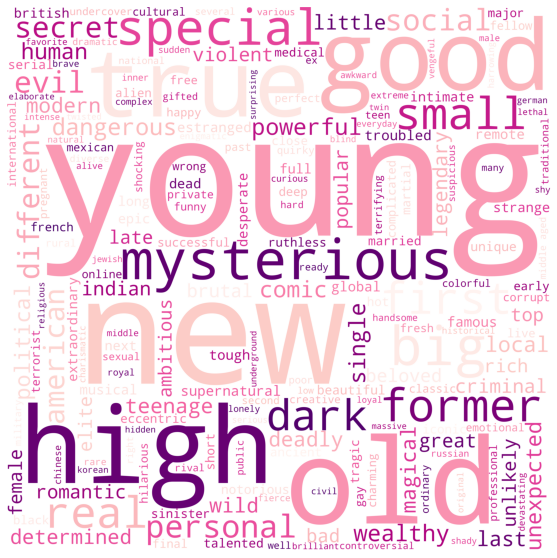

In [140]:
plt_wc(pos_words['ADJ'])

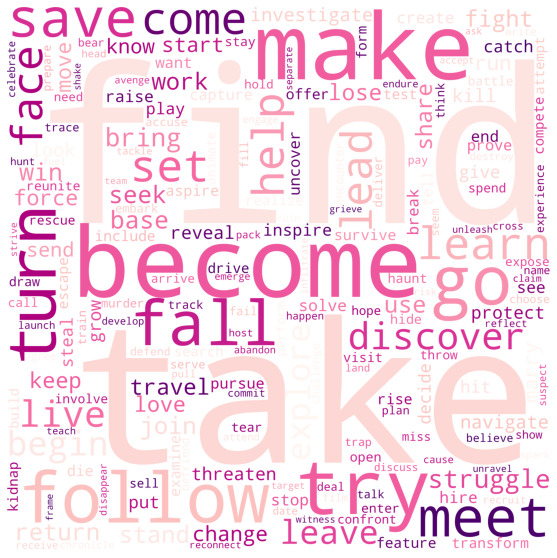

In [141]:
plt_wc(pos_words['VERB'])